# A simple parser for LTspice files

**Scott Prahl**

May 2022

This notebook shows a how some simple LTspice `.asc` circuit files may be converted to a simple netlist for use with the `lcapy` circuit analysis package.

In [1]:
import lcapy
import ltparser

# make matplotlib hires
%config InlineBackend.figure_format='retina'

## Simple Voltage Source and Resistor

Open an LTspice file and convert to a simple netlist.

<img src="images/simple1.png" width=20%>

In [2]:
lt = ltparser.LTspice()
lt.read("../tests/examples/simple1.asc")
lt.make_netlist()
print(lt.netlist)

W 1 2; right
W 1 3; down
W 2 4; down
W 5 6; down
W 7 8; down
W 6 8; right
W 6 0; down
V1 3 5 5.0; down
R1 4 7 1000.0; down



In [3]:
lt.read("../tests/examples/simple1.asc")
lt.make_netlist(renumber_nodes=False)
print(lt.netlist)

W 3 2; right
W 3 4; down
W 2 5; down
W 7 6; down
W 9 8; down
W 6 8; right
W 6 0; down
V1 4 7 5.0; down
R1 5 9 1000.0; down



The primary reason for this netlist is to allow us to use the `lcapy` package to draw the circuit and do some analysis.  Here we create a `lcapy.Circuit()` object and use that to draw the circuit.  The default settings are  not perfect, but allow us to directly visualize the circuit.

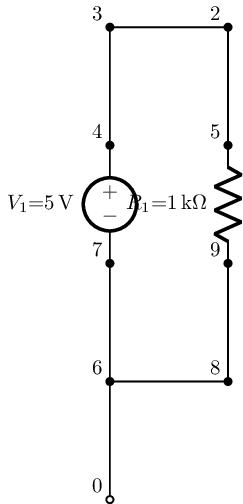

In [4]:
cct = lt.circuit()
cct.draw(scale=0.5)

Since we have the netlist, we can copy-and-paste the netlist to allow us to change the horizontal size and add a ground symbol.

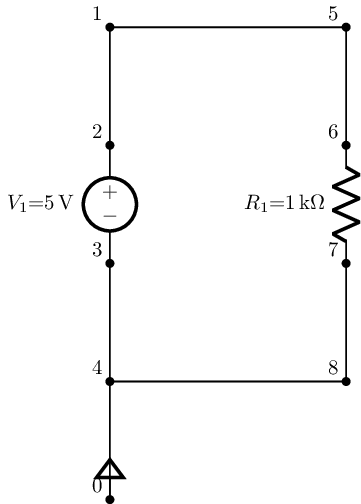

In [5]:
cct = lcapy.Circuit()
cct.add(
    """
W 5 1; left=2
W 2 1; up
W 6 5; up
W 4 3; up
W 8 7; up
W 8 4; left
W 0 4; up
V1 2 3 5.0; down
R1 6 7 1000.0; down
;autoground=True
"""
)
cct.draw(scale=0.5)

## An even simpler circuit

W 3 2; right
W 5 4; right
W 5 0; down
V1 3 5 3.3; down
R1 2 4 4700000.0; down



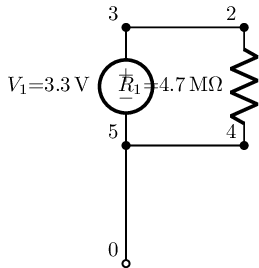

In [6]:
lt = ltparser.LTspice()
lt.read("../tests/examples/simple0.asc")
lt.single_ground = False
lt.make_netlist(renumber_nodes=False)
print(lt.netlist)

cct = lt.circuit()
cct.draw(scale=0.5)

In [7]:
lt.read("../tests/examples/simple0.asc")
lt.single_ground = False
lt.make_netlist()
print(lt.netlist)

W 1 2; right
W 3 4; right
W 3 0; down
V1 1 3 3.3; down
R1 2 4 4700000.0; down



## A circuit with multiple ground symbols

Original
W 4 3; right
W 4 5; down
W 3 6; down
V1 5 0 5.0; down
R1 6 0 1000.0; down



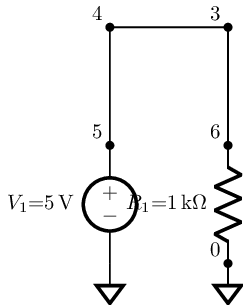

In [8]:
lt = ltparser.LTspice()
lt.read("../tests/examples/simple2.asc")

print("Original")
lt.make_netlist(renumber_nodes=False)
print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

W 1 2; right
W 1 3; down
W 2 4; down
V1 3 0_1 5.0; down
R1 4 0_2 1000.0; down



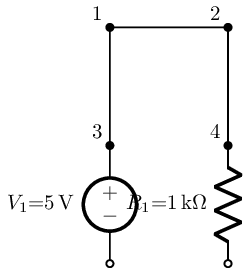

In [9]:
## print("Renumbered")
lt.read("../tests/examples/simple2.asc")
lt.make_netlist(renumber_nodes=True)
print(lt.netlist)

cct = lt.circuit()
cct.draw(scale=0.5)

## A resonant series circuit

got unicode error with utf-8 , trying different encoding
W 1 2; right
W 3 4; right
W 4 5; down
W 1 6; down
W 7 8; down
W 9 0_1; down
W 10 11; down
W 0_2 11; right
R1 2 3 2.0; right
L1 5 7 0.001; down
C1 8 10 4e-07; down
V 6 9 ac 20.000000; down



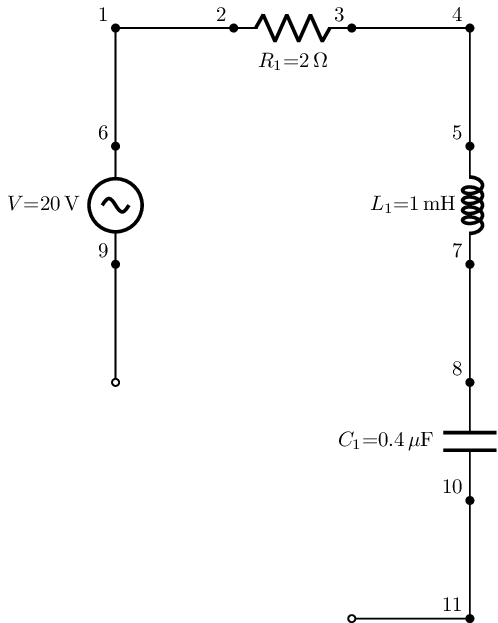

In [10]:
lt = ltparser.LTspice()
lt.read("../tests/examples/resonant-series.asc")
lt.make_netlist()
print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

## Circuit to make sure that voltage elements are oriented correctly

W 1 2; right
W 3 4; right
W 4 5; right
W 5 6; right
W 7 8; right
W 8 9; right
W 9 10; right
W 11 12; right
W 1 13; down
W 4 14; down
W 5 15; down
W 8 16; down
W 9 17; down
W 12 18; down
W 19 20; down
W 20 21; right
W 22 23; down
W 24 23; right
W 25 26; down
W 23 26; right
W 26 27; right
W 28 29; down
W 30 29; right
W 31 32; down
W 29 32; right
W 32 33; right
W 34 35; down
W 36 35; right
W 20 0; down
V1 13 19 1.0; down
V2 3 2 2.0; left
V3 22 14 3.0; up
V4 21 24 4.0; right
R1 15 25 1.0; down
R2 6 7 1000.0; right
R3 16 28 0.001; down
R4 27 30 1000000.0; right
C1 17 31 1e-09; down
C2 10 11 1.0; right
C3 18 34 0.001; down
C4 33 36 1e-06; right



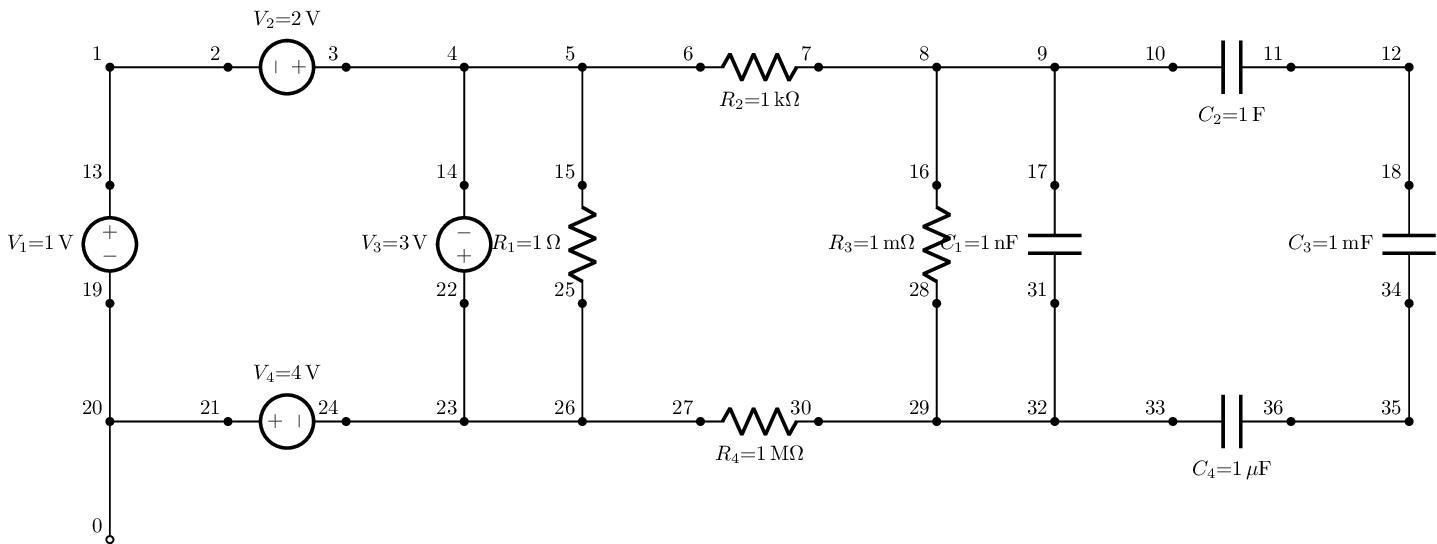

In [11]:
lt = ltparser.LTspice()
lt.read("../tests/examples/orientation-test.asc")
lt.make_netlist()
print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

## Circuit to make sure that current elements are oriented correctly

W 1 2; right
W 3 4; right
W 4 5; right
W 5 6; right
W 7 8; right
W 8 9; right
W 9 10; right
W 11 12; right
W 1 13; down
W 4 14; down
W 5 15; down
W 8 16; down
W 9 17; down
W 12 18; down
W 19 20; down
W 20 21; right
W 22 23; down
W 24 23; right
W 25 26; down
W 23 26; right
W 26 27; right
W 28 29; down
W 30 29; right
W 31 32; down
W 29 32; right
W 32 33; right
W 34 35; down
W 36 35; right
W 20 0; down
I1 13 19 0.001; down, invert
I2 3 2 3e-06; left, invert
I3 22 14 4.0; up, invert
I4 21 24 0.006; right, invert
L1 15 25 ; down
L2 6 7 ; right
L3 16 28 ; down
L4 27 30 ; right
C1 17 31 ; down, kind=polar, invert
C2 11 10 ; left, kind=polar, invert
C3 34 18 ; up, kind=polar, invert
C4 33 36 ; right, kind=polar, invert



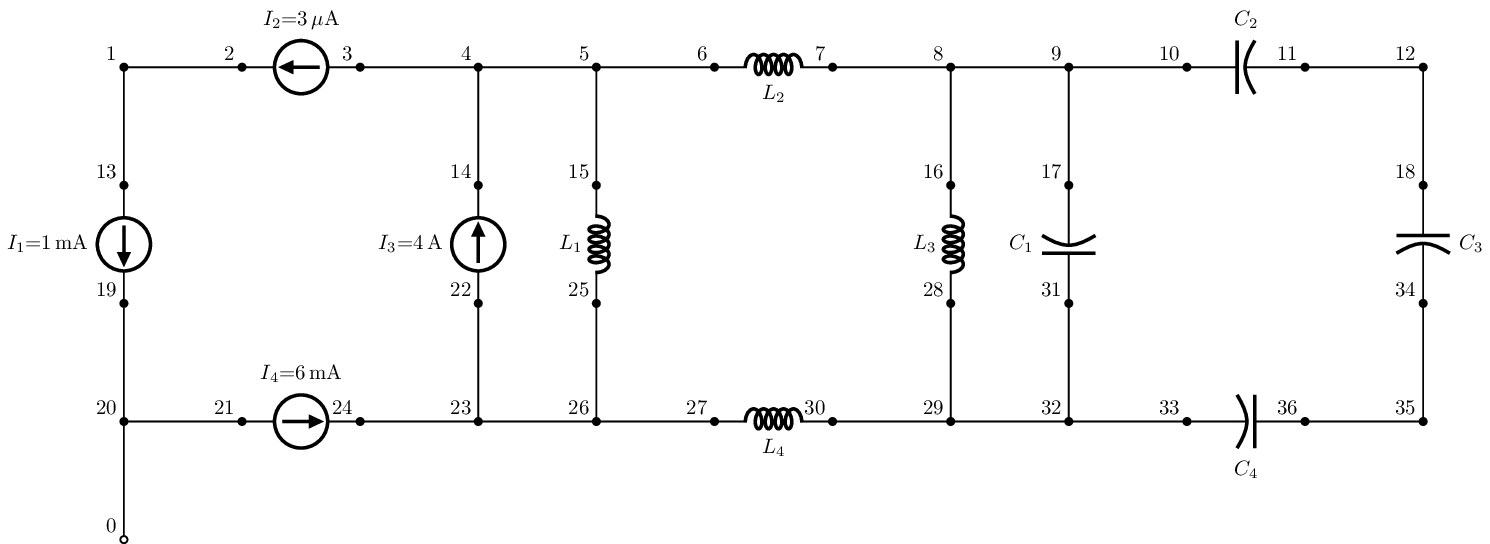

In [12]:
lt = ltparser.LTspice()
lt.read("../tests/examples/orientation-test2.asc")
lt.make_netlist()
print(lt.netlist)

cct = lt.circuit()
cct.draw(scale=0.5)

## Twin-T filter

In [13]:
lt = ltparser.LTspice()
lt.read("../tests/examples/twin-t.asc")
lt.make_netlist()
print(lt.contents)

Version 4
SHEET 1 880 680
WIRE -16 80 -112 80
WIRE 96 80 48 80
WIRE 128 80 96 80
WIRE 160 80 128 80
WIRE 304 80 224 80
WIRE 320 80 304 80
WIRE -160 112 -224 112
WIRE -112 112 -112 80
WIRE -112 112 -160 112
WIRE -112 160 -112 112
WIRE -80 160 -112 160
WIRE 32 160 0 160
WIRE 96 160 32 160
WIRE 192 160 96 160
WIRE 320 160 320 80
WIRE 320 160 272 160
WIRE -224 176 -224 112
WIRE 128 192 128 80
WIRE 32 208 32 160
WIRE -224 288 -224 256
WIRE 32 288 32 272
WIRE 32 288 -224 288
WIRE 80 288 32 288
WIRE 128 288 128 272
WIRE 128 288 80 288
WIRE 80 320 80 288
FLAG 80 320 0
FLAG -160 112 in
FLAG 96 80 c
FLAG 96 160 r
FLAG 304 80 out
SYMBOL res 112 176 R0
SYMATTR InstName R3
SYMATTR Value 159.1k
SYMBOL res 16 144 R90
WINDOW 0 0 56 VBottom 2
WINDOW 3 32 56 VTop 2
SYMATTR InstName R2
SYMATTR Value 318.3k
SYMBOL res 288 144 R90
WINDOW 0 0 56 VBottom 2
WINDOW 3 32 56 VTop 2
SYMATTR InstName R1
SYMATTR Value 318.3k
SYMBOL cap 16 208 R0
SYMATTR InstName C3
SYMATTR Value 20n
SYMBOL cap 48 64 R90
WINDOW 0 0 

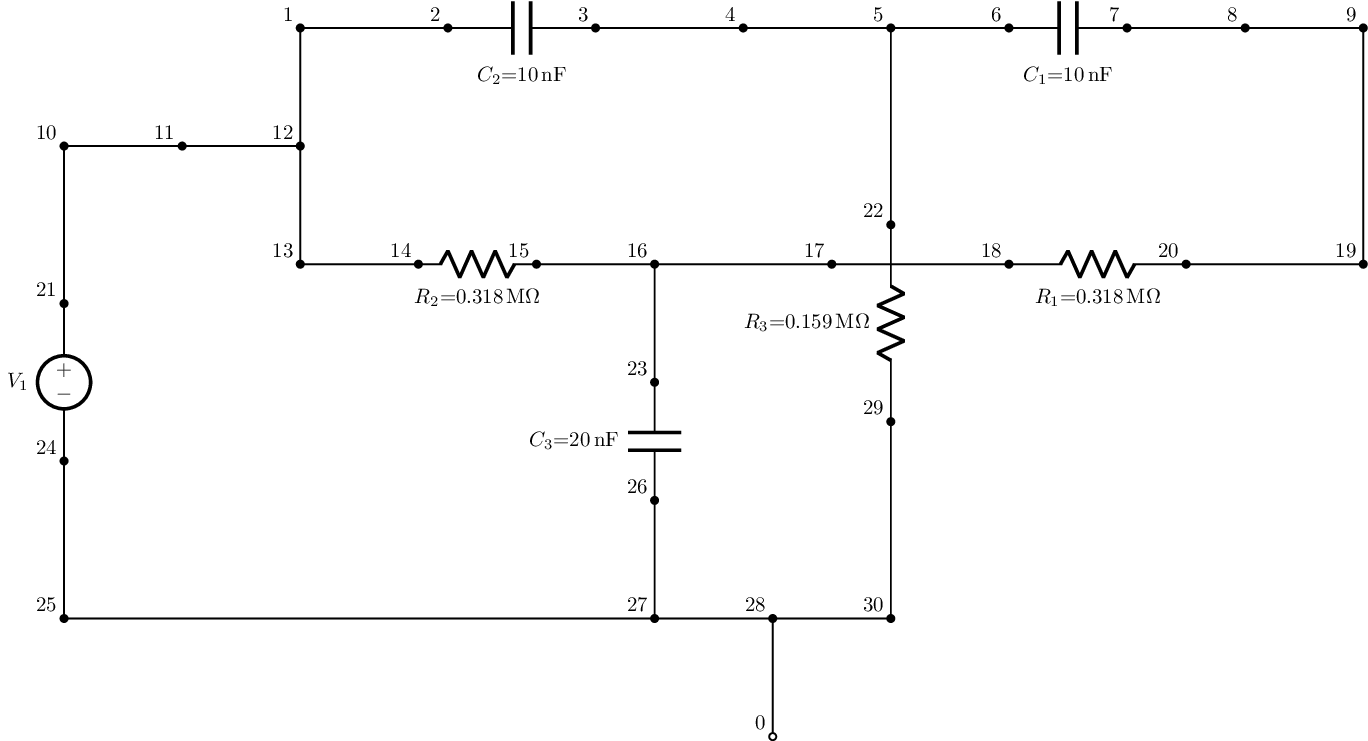

In [14]:
cct = lt.circuit()
cct.draw(scale=0.5)

## Passive crossover circuit

This one has 'µ' in as part of labels.

got unicode error with utf-8 , trying different encoding


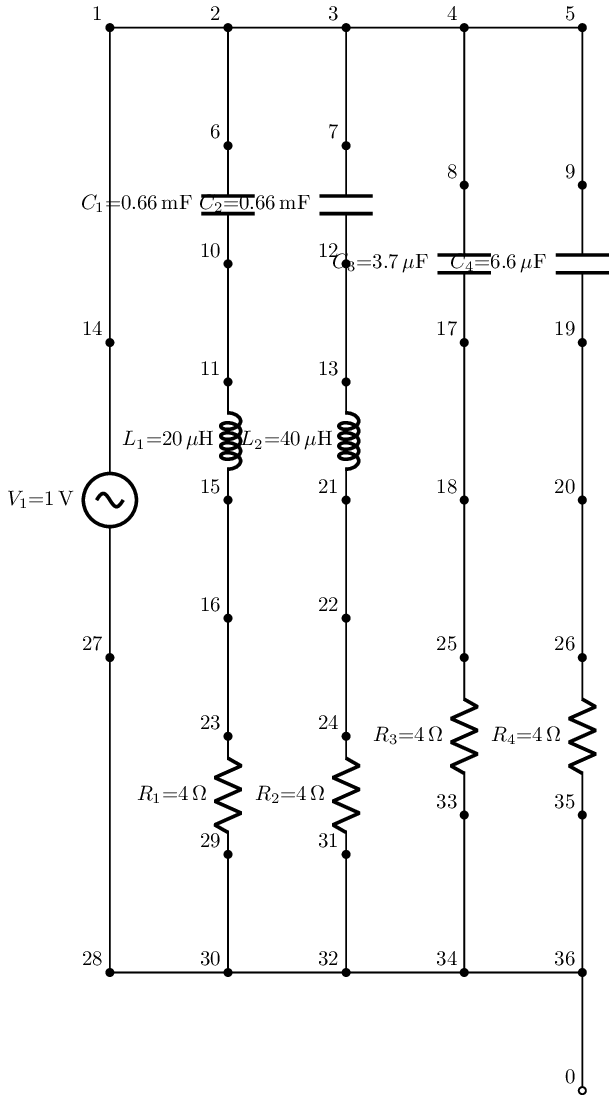

In [15]:
lt = ltparser.LTspice()
lt.read("../tests/examples/passive-crossover.asc")
cct = lt.circuit()
cct.draw(scale=0.5)